# First Steps with Pandas

In [193]:
import pandas as pd

# Importing Data

In [194]:
df = pd.read_csv('20171130_SIX_ManagementAktien.csv')

# Looking at summary of the data

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 6 columns):
Unnamed: 0     1179 non-null int64
Company        1179 non-null object
Date           1179 non-null object
Price          1169 non-null object
Share Total    1179 non-null object
Type           1179 non-null object
dtypes: int64(1), object(5)
memory usage: 55.3+ KB


[Pandas data types, and Python data types](http://www.datacarpentry.org/python-ecology-lesson/03-data-types-and-format/)

# Looking at a snippet of the data

In [196]:
df.head()

,Unnamed: 0,Company,Date,Price,Share Total,Type
0,0,ABB Ltd,30.10.2017,362'229.00,14'323,Purchase
1,1,ABB Ltd,30.10.2017,304'289.00,12'032,Purchase
2,2,ABB Ltd,30.10.2017,10'060.00,500,Purchase
3,3,ABB Ltd,30.10.2017,10'060.00,500,Purchase
4,4,Banque Cantonale Vaudoise,27.10.2017,10'620.00,15,Purchase


# Deleting unnecessary data

In [197]:
del df['Unnamed: 0']

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 5 columns):
Company        1179 non-null object
Date           1179 non-null object
Price          1169 non-null object
Share Total    1179 non-null object
Type           1179 non-null object
dtypes: object(5)
memory usage: 46.1+ KB


# Data Types

Sharetotal und Price sollten Zahlen sind.

In [199]:
df['Share Total'].astype(int)

ValueError: invalid literal for int() with base 10: "14'323"

## Create function and apply it

In [200]:
def comma(elem):
    elem = elem.replace("'", '')
    return elem

In [201]:
df['Share Total'] = df['Share Total'].apply(comma)

In [202]:
df['Share Total'] = df['Share Total'].astype(int)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 5 columns):
Company        1179 non-null object
Date           1179 non-null object
Price          1169 non-null object
Share Total    1179 non-null int64
Type           1179 non-null object
dtypes: int64(1), object(4)
memory usage: 46.1+ KB


## Lets sort the values

In [204]:
df['Share Total'].sort_values(ascending=False).head()

1017    27205398
364      4859499
610      3496500
538      3000000
7        2190000
Name: Share Total, dtype: int64

In [205]:
df[df['Share Total']==27205398]

,Company,Date,Price,Share Total,Type
1017,KTM Industries AG,23.02.2017,133'306'450.20,27205398,Sale


## Or, if we want to see the whole sorted table 

In [206]:
df.sort_values(by='Share Total', ascending=False).head()

,Company,Date,Price,Share Total,Type
1017,KTM Industries AG,23.02.2017,133'306'450.20,27205398,Sale
364,Idorsia Ltd,19.06.2017,69'765'826.00,4859499,Purchase
610,SCHMOLZ+BICKENBACH AG,04.05.2017,3'251'745.00,3496500,Sale
538,RELIEF THERAPEUTICS Holding AG,16.05.2017,30'000.00,3000000,Sale
1082,ams AG,07.02.2017,481'800.00,2190000,Purchase


## Jetzt zu den Preisen. Wir wenden wieder unsere Function an, aber es gibt einen Fehler. Warum?

In [207]:
df['Price'].apply(comma)

AttributeError: 'float' object has no attribute 'replace'

In [208]:
def comma(elem):
    try:
        elem = elem.replace("'", '').split('.')[0]
        return int(elem)
    except:
        return elem

In [209]:
df['Price'] = df['Price'].apply(comma)

## Another way of dealing with NaN Values -> Drop them

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 5 columns):
Company        1179 non-null object
Date           1179 non-null object
Price          1169 non-null float64
Share Total    1179 non-null int64
Type           1179 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 46.1+ KB


In [211]:
df = df.dropna()

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1178
Data columns (total 5 columns):
Company        1169 non-null object
Date           1169 non-null object
Price          1169 non-null float64
Share Total    1169 non-null int64
Type           1169 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 54.8+ KB


[Documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)

In [213]:
df['Price'] = df['Price'].apply(comma)

Price in Millions

In [214]:
df['Price_m'] = round(df['Price'] / 1000000, 1)

In [215]:
df.sort_values(by='Price_m', ascending=False).head()

,Company,Date,Price,Share Total,Type,Price_m
1017,KTM Industries AG,23.02.2017,133306450.0,27205398,Sale,133.3
885,Bank Coop AG,22.03.2017,77992272.0,1751848,Purchase,78.0
364,Idorsia Ltd,19.06.2017,69765826.0,4859499,Purchase,69.8
68,Feintool International Holding AG,29.09.2017,64732500.0,616500,Sale,64.7
312,Idorsia Ltd,07.07.2017,30621900.0,1531095,Purchase,30.6


## Who sold the most?

## Lets just consider the sales

In [216]:
df['Type'].value_counts()

Sale                  694
Purchase              473
Granting / Writing      2
Name: Type, dtype: int64

In [217]:
dfs = df[df['Type']=='Sale']

In [218]:
dfs.groupby('Company')['Price_m'].sum().sort_values(ascending=False).head(10)

Company
KTM Industries AG                        139.8
Temenos Group AG                          67.8
Feintool International Holding AG         65.4
Chocoladefabriken Lindt & Sprüngli AG     37.9
Molecular Partners Ltd                    28.0
Cosmo Pharmaceuticals N.V.                26.6
Partners Group Holding AG                 16.4
Vontobel Holding AG                       15.9
ams AG                                    15.4
Compagnie Financière Richemont SA         15.0
Name: Price_m, dtype: float64

## And the buys?

In [219]:
dfp = df[df['Type']=='Purchase']

In [220]:
dfp.groupby('Company')['Price_m'].sum().sort_values(ascending=False).head(10)

Company
Idorsia Ltd                            147.0
Bank Coop AG                            78.0
Ypsomed Holding AG                      21.2
Compagnie Financière Tradition S.A.     19.8
Temenos Group AG                        14.9
Logitech International S.A.             10.8
ams AG                                  10.0
Arbonia AG                               9.6
Edmond de Rothschild (Suisse) S.A.       7.8
Nestlé AG                                7.3
Name: Price_m, dtype: float64

## Now lets look at the dates, this can get tricky

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1178
Data columns (total 6 columns):
Company        1169 non-null object
Date           1169 non-null object
Price          1169 non-null float64
Share Total    1169 non-null int64
Type           1169 non-null object
Price_m        1169 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 63.9+ KB


In [222]:
df['Date'].head()

0    30.10.2017
1    30.10.2017
2    30.10.2017
3    30.10.2017
4    27.10.2017
Name: Date, dtype: object

In [223]:
from datetime import datetime

In [224]:
pd.to_datetime(df['Date'], format='%d.%m.%Y')

0      2017-10-30
1      2017-10-30
2      2017-10-30
3      2017-10-30
4      2017-10-27
5      2017-10-27
6      2017-10-27
7      2017-10-27
8      2017-10-27
9      2017-10-27
10     2017-10-26
11     2017-10-26
12     2017-10-26
13     2017-10-25
14     2017-10-25
15     2017-10-25
16     2017-10-25
17     2017-10-25
18     2017-10-24
19     2017-10-24
20     2017-10-23
21     2017-10-20
22     2017-10-20
23     2017-10-18
24     2017-10-17
25     2017-10-17
26     2017-10-16
27     2017-10-16
28     2017-10-16
29     2017-10-13
          ...    
1149   2017-01-12
1150   2017-01-12
1151   2017-01-12
1152   2017-01-12
1153   2017-01-12
1154   2017-01-12
1155   2017-01-12
1156   2017-01-11
1157   2017-01-11
1158   2017-01-11
1159   2017-01-11
1160   2017-01-10
1161   2017-01-10
1162   2017-01-10
1163   2017-01-10
1164   2017-01-09
1165   2017-01-09
1166   2017-01-09
1167   2017-01-09
1168   2017-01-06
1169   2017-01-06
1170   2017-01-06
1171   2017-01-05
1172   2017-01-05
1173   201

In [225]:
df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1178
Data columns (total 6 columns):
Company        1169 non-null object
Date           1169 non-null datetime64[ns]
Price          1169 non-null float64
Share Total    1169 non-null int64
Type           1169 non-null object
Price_m        1169 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 103.9+ KB


# Let's plot the transaction counts

[Code overview](http://benalexkeen.com/resampling-time-series-data-with-pandas/)

# First we need to make the date the index

In [230]:
df.index = df['Date']

In [232]:
df.resample('W')['Date'].count().head()

Date
2017-01-08    11
2017-01-15    25
2017-01-22    21
2017-01-29    18
2017-02-05    14
Freq: W-SUN, Name: Date, dtype: int64

## Lets plot that

In [233]:
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')
%matplotlib inline

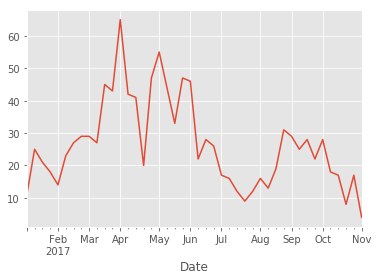

In [234]:
df.resample('W')['Date'].count().plot()

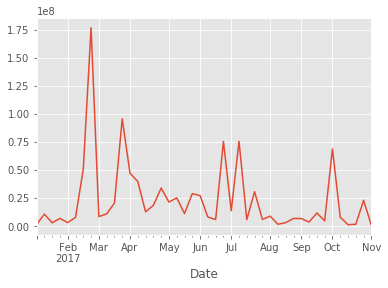

In [235]:
df.resample('W')['Price'].sum().plot()

# Shall we print this out?

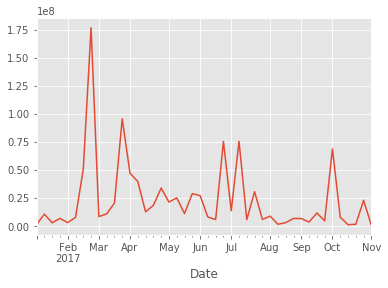

In [237]:
df.resample('W')['Price'].sum().plot()
plt.savefig('hello.pdf')

## But what about different shapes?

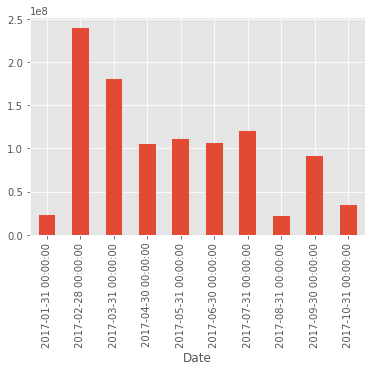

In [241]:
df.resample('M')['Price'].sum().plot(kind='bar')

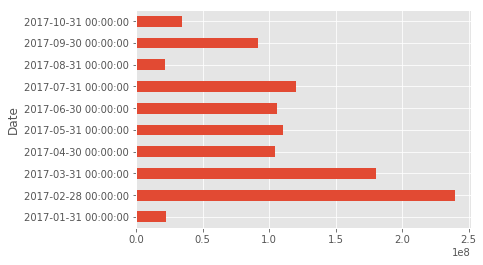

In [249]:
df.resample('M')['Price'].sum().plot(kind='barh')

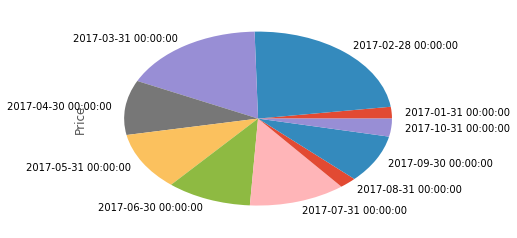

In [252]:
df.resample('M')['Price'].sum().plot(kind='pie')

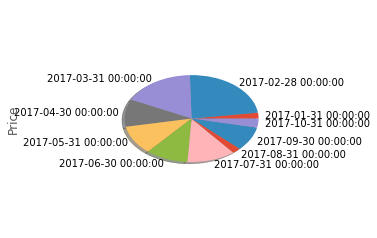

In [255]:
df.resample('M')['Price'].sum().plot(kind='pie', radius=0.5, shadow=True)

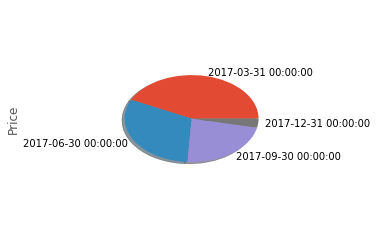

In [256]:
df.resample('Q')['Price'].sum().plot(kind='pie', radius=0.5, shadow=True)

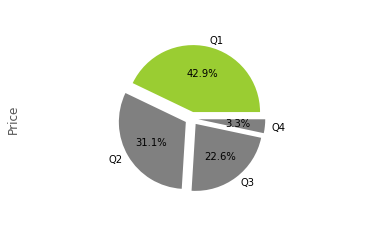

In [268]:
labels = 'Q1', 'Q2', 'Q3', 'Q4'
colors = ['yellowgreen', 'grey', 'grey', 'grey']
explode = (0.05, 0.05, 0.05, 0.05)
plt.axis('equal')
df.resample('Q')['Price'].sum().plot(kind='pie', radius=0.5, autopct='%1.1f%%', shadow=False, labels=labels,colors=colors, explode=explode)